<a href="https://colab.research.google.com/github/KSeungBin/python/blob/master/types_of_data_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 변수의 종류

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = {
    'Name':['John', 'Sabre', 'Kim', 'Sato', 'Lee', 'Smith', 'David', 'Park'],
    'Country':['USA', 'France', 'Korea', None, 'Korea', 'UK', 'USA', 'Korea'],
    'Age':['31', 33, None, 40, 36, 55, np.nan, 35], # numerical인데 categorical처럼 인식될 수 있음
    'Job':['Student', np.nan, 'Developer', 'Chef', 'Professor', 'CEO', 'Banker', 'Student'],
    'Hand':['L', 'R', 'R', 'B', 'L', 'L', 'R', 'R'],
    'Height':['T', 'S', 'M', 'S', 'T', 'S', 'S', 'T'],
    'Capital':[48.35, 150.8, 99.0, 100.0, 182.3, 1101.65, 131.87, 65.8]
}

df_nan = pd.DataFrame(data)
df = df_nan.copy()
df

,Name,Country,Age,Job,Hand,Height,Capital
0,John,USA,31,Student,L,T,48.35
1,Sabre,France,33,NaN,R,S,150.80
2,Kim,Korea,None,Developer,R,M,99.00
3,Sato,None,40,Chef,B,S,100.00
4,Lee,Korea,36,Professor,L,T,182.30
5,Smith,UK,55,CEO,L,S,1101.65
6,David,USA,NaN,Banker,R,S,131.87
7,Park,Korea,35,Student,R,T,65.80


In [3]:
df.info()
# Age는 float, int가 아닌 object('31' )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     8 non-null      object 
 1   Country  7 non-null      object 
 2   Age      6 non-null      object 
 3   Job      7 non-null      object 
 4   Hand     8 non-null      object 
 5   Height   8 non-null      object 
 6   Capital  8 non-null      float64
dtypes: float64(1), object(6)
memory usage: 576.0+ bytes


In [5]:
# Age -> Int16[+] : 정수형 데이터 타입으로 변환
# None, NaN 값을 바로 int로 바꾸면 오류 발생(float로 먼저 변환한 후 -> int로 변환하면 None은 정수형 칼럼에서 누락값으로 처리됨)
# 즉, int로 바로 변환 하면 null 값 때문에 에러가 발생하는데, float는 null 값을 처리할 수 있음
df['Age'] = df['Age'].astype('Float32').astype('Int16')
df

,Name,Country,Age,Job,Hand,Height,Capital
0,John,USA,31,Student,L,T,48.35
1,Sabre,France,33,NaN,R,S,150.80
2,Kim,Korea,<NA>,Developer,R,M,99.00
3,Sato,None,40,Chef,B,S,100.00
4,Lee,Korea,36,Professor,L,T,182.30
5,Smith,UK,55,CEO,L,S,1101.65
6,David,USA,<NA>,Banker,R,S,131.87
7,Park,Korea,35,Student,R,T,65.80


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     8 non-null      object 
 1   Country  7 non-null      object 
 2   Age      6 non-null      Int16  
 3   Job      7 non-null      object 
 4   Hand     8 non-null      object 
 5   Height   8 non-null      object 
 6   Capital  8 non-null      float64
dtypes: Int16(1), float64(1), object(5)
memory usage: 536.0+ bytes


In [8]:
# categorical column, numerical column
cat_cols = ['Name', 'Country', 'Job', 'Hand', 'Height']
num_cols = ['Age', 'Capital']

In [10]:
cat_cols

['Name', 'Country', 'Job', 'Hand', 'Height']

In [12]:
# discrete한 숫자인 정수로 모두 변환하는 것이 목적(=encoding)
df[cat_cols]

,Name,Country,Job,Hand,Height
0,John,USA,Student,L,T
1,Sabre,France,NaN,R,S
2,Kim,Korea,Developer,R,M
3,Sato,None,Chef,B,S
4,Lee,Korea,Professor,L,T
5,Smith,UK,CEO,L,S
6,David,USA,Banker,R,S
7,Park,Korea,Student,R,T


In [13]:
df_enc = df.copy()

- LabelEncoding하는 방법
    - 판다스에서 직접하는 방법
    - sklearn을 이용하는 방법

In [14]:
from sklearn.preprocessing import OrdinalEncoder

# Hand 칼럼 ordinal [+] : R, L, B(양손잡이)를 숫자로 인코딩
# Hand column은 순서가 없는 nominal data : 항상 정수로 변환해서 처리해야 함
ord_enc = OrdinalEncoder()
ord_enc.fit(df[['Hand']]) # 변환 작업할 때 python의 scikit-learn 사용 : 항상 fit -> transform 순서 
ord_enc.transform(df[['Hand']])

array([[1.],
       [2.],
       [2.],
       [0.],
       [1.],
       [1.],
       [2.],
       [2.]])

In [ ]:
df_enc['Hand'] = ord_enc.transform(df[['Hand']])
df_enc

- Hand는 순서가 없는 Norminal 변수인데 0 < 1 < 2로 인코딩되어서 차후 모델이 학습될 때 이 순서를 결과에 반영할 수 있게 됨

- 이런 경우 원핫인코딩을 사용하는 것이 더 좋음

In [15]:
# 정수로 변환하는 방법 1. 1,2,3,4.... 로 변경 : '크기'순으로 분류되어서는 안 되므로 1번 방법은 사용할 수 없음
# 2. category 개수만큼 0을 채우고, 해당하는 항목에만 1을 채우는 원핫 인코딩
from sklearn.preprocessing import OneHotEncoder

# Hand 칼럼 onehot [+]
oh_enc = OneHotEncoder(sparse=False)
oh_enc.fit(df[['Hand']])
oh_enc.transform(df[['Hand']])

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [ ]:
oh_enc.get_feature_names_out()

In [ ]:
df_enc = pd.concat( [df_enc, pd.DataFrame(oh_enc.transform(df[['Hand']]), 
                    columns=oh_enc.get_feature_names_out())], axis=1).drop('Hand', axis=1)
df_enc

- Height는 순서가 있는 Ordinal 변수 이므로 그대로 OrdinalEncoding

In [16]:
ord_enc.fit(df[['Height']])
ord_enc.transform(df[['Height']])

array([[2.],
       [1.],
       [0.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.]])

- 인코딩 된 결과를 보면  M:0 < S:1 < T:2 로 되어 S < M < T 라는 의도된 순서를 지키지 못함

- 순서대로 하기 위해 카테고리 순서를 직접 입력

In [18]:
# height 칼럼 ordinal 순서 지켜서[+]
# 순서가 있는 데이터는 정수로 변환할 때 순서를 지켜야 함
ord_enc = OrdinalEncoder(categories=[['S','M','T']])
ord_enc.fit(df[['Height']])
ord_enc.transform(df[['Height']])

# 즉 순서가 없는 데이터는 원핫인코딩(OneHotEncoder)
# 순서가 있는 데이터는 내가 순서를 직접 지정해주고 변환(OrdinalEncoder)

array([[2.],
       [0.],
       [1.],
       [0.],
       [2.],
       [0.],
       [0.],
       [2.]])

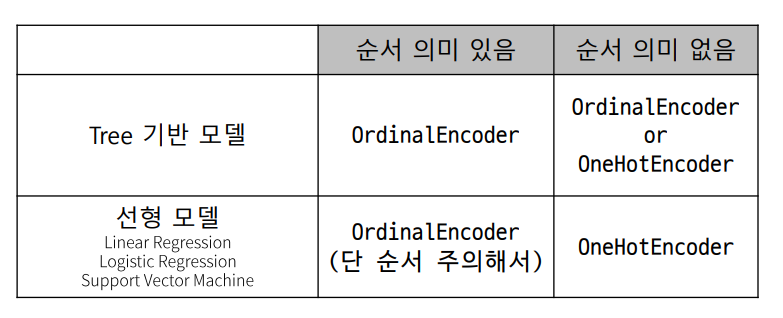

- 트리 기반 모델을 사용하면 순서 상관 없음

-결과를 보면 S:0 < M:1 < T:2 로 제대로 인코딩 된 것을 확인

In [ ]:
df_enc['Height'] = ord_enc.transform(df[['Height']])
df_enc